#Mini Data Mining 


In this notebook we'll look at a small dataset and apply Data cleansing techniques (imputation for the missing data,address real or discrete values) and in the end apply the ID3 tree generation algotihm on the dataset.


Firstly lets import some libraries for adressing the data


In [ ]:
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn import tree
from matplotlib import pyplot as plt

Now let's import the data

In [ ]:
data = pd.read_csv("/content/11.csv")

Printing the data dataframe:

In [ ]:
data

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
0,1,51-60,no,married,yes,yes,no,yes,no
1,2,Above 70,??,married,yes,yes,yes,yes,yes
2,3,31-40,no,single,no,yes,yes,no,no
3,4,Above 70,yes,XXX,yes,yes,yes,yes,yes
4,5,51-60,yes,single,no,no,yes,no,no
5,6,51-60,yes,married,no,yes,yes,no,??
6,7,61-70,yes,married,yes,yes,no,no,yes
7,8,51-60,yes,married,yes,no,no,no,no
8,9,61-70,no,married,no,yes,no,??,no
9,10,41-50,no,married,no,no,yes,no,no


# Step 1 - Data cleansing

##1.1 COPD column -

In [ ]:
data[data['COPD'] == "??"]

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
5,6,51-60,yes,married,no,yes,yes,no,??


Firstly as we can see we have one sample in the dataset that has a missing value in the 'COPD' column, that is the column that we will want to predict, so this sample wont contribute to the learning proccess.
Remember that the the learniong process consists of feature set/vector and a label, thus not having a lable for that sample we can just remove it.

*The technique that was used wastaken from 'Missing Values, 1. Ignore the tuple', page 57 from the course book.

In [ ]:
data.drop(index = 5,inplace = True) # Dropping the index of that sample from the data

In [ ]:
data.reset_index(inplace = True, drop = True) # Reset the indexes of the dataframe

Let's look at the dataset now

In [ ]:
data

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
0,1,51-60,no,married,yes,yes,no,yes,no
1,2,Above 70,??,married,yes,yes,yes,yes,yes
2,3,31-40,no,single,no,yes,yes,no,no
3,4,Above 70,yes,XXX,yes,yes,yes,yes,yes
4,5,51-60,yes,single,no,no,yes,no,no
5,7,61-70,yes,married,yes,yes,no,no,yes
6,8,51-60,yes,married,yes,no,no,no,no
7,9,61-70,no,married,no,yes,no,??,no
8,10,41-50,no,married,no,no,yes,no,no
9,11,61-70,yes,married,yes,yes,no,yes,yes


## 1.2 Smoking column -


Now we'll continue with looking at the 'smoking' columnn to check for missing values

In [ ]:
data[data['smoking'] == "??"]

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
1,2,Above 70,??,married,yes,yes,yes,yes,yes


As we can see we have 1 sample that doesnt have a values in the smoking column.

Notice that the data set is really small so dropping/removing the sample is not recommended at all because it can impact the mdoels performance, so we'll try a different approach.

We'll try to use central tendency for the 'smoking' attribute to try and fill the most fitting values based on other examples.

Because all of our variables/features are categorical we'll can only use the mode of the colums to rty and find the most appropriate value.

Next well apply the 'groupby' coupled with 'mode' to get a pivot-table like dataframe that has the mode values of each column to analize.

In [ ]:
data_smoking = data.groupby('smoking').agg(pd.Series.mode)

Let's print the dataframe

In [ ]:
data_smoking

,no. of participant,age range,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
smoking,,,,,,,,
??,2,Above 70,married,yes,yes,yes,yes,yes
no,"[1, 3, 9, 10]","[31-40, 41-50, 51-60, 61-70]",married,no,yes,"[no, yes]",no,no
yes,"[4, 5, 7, 8, 11, 12]","[51-60, 61-70]",married,yes,yes,"[no, yes]",no,"[no, yes]"


Next a probable approach would be to count how many similar mode values we have in regards to the sample we're trying to fill.

Notice that we have colums that have a list like [no,yes] which means that that the value count is the same so we may ignore them in the counting. Also the 'index', 'no. of participant', isnt valuble to use for the counting so well ignore those columns.

Moreover notice that the 'phlegm' column has the same occurance for 'yes' and 'no', so it also wont affect the counting of similar mode values, well ignore it.

The marital status is also the same for all colums, well ignore it.

Now lets look the the more compact looking pivot table with mode values of the columns

In [ ]:
data_smoking_compact = data_smoking.drop(['no. of participant','marital status','phlegm'], axis=1)

Let's look the the new table

In [ ]:
data_smoking_compact

,age range,Dyspnea during exercise,wheezing,uses an inhaler,COPD
smoking,,,,,
??,Above 70,yes,yes,yes,yes
no,"[31-40, 41-50, 51-60, 61-70]",no,yes,no,no
yes,"[51-60, 61-70]",yes,yes,no,"[no, yes]"


Notice that the samples 'age range' is 'above 70' and we have a mode value in both lines that have '61-70', so well assume that the 'above 70' will be can be similar small to them assuing that the average human death age is 77. we'll also ingo this  column for the decision.

Also notice that the mode of 'uses an inhaler' feature is different from that samples values, so well ignore it.

In [ ]:
data_smoking_compact.drop(['age range','uses an inhaler'],axis=1,inplace=True)

In [ ]:
data_smoking_compact

,Dyspnea during exercise,wheezing,COPD
smoking,,,
??,yes,yes,yes
no,no,yes,no
yes,yes,yes,"[no, yes]"


Now that it is really compact we can see(and count) that the most similar common attrributes are for the 'yes' value, which has 3 in contrast to the 'no' values which has only 1 mode value in the other colums. So well fill the samples 'smoking' feature with 'yes'

In [ ]:
sample_index = data[data['smoking'] == "??"].index[0] # get the samples index

In [ ]:
data.at[sample_index,'smoking'] = 'yes' # replace the ?? with yes

Now lets check the smoking column in the data

In [ ]:
data

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
0,1,51-60,no,married,yes,yes,no,yes,no
1,2,Above 70,yes,married,yes,yes,yes,yes,yes
2,3,31-40,no,single,no,yes,yes,no,no
3,4,Above 70,yes,XXX,yes,yes,yes,yes,yes
4,5,51-60,yes,single,no,no,yes,no,no
5,7,61-70,yes,married,yes,yes,no,no,yes
6,8,51-60,yes,married,yes,no,no,no,no
7,9,61-70,no,married,no,yes,no,??,no
8,10,41-50,no,married,no,no,yes,no,no
9,11,61-70,yes,married,yes,yes,no,yes,yes


*The technique that was used was taken from page 57 from the course book:

'Missing Values, 4. Use a measure of central tendency for the attribute (e.g., the mean or median) to fill in the miss-
ing value', with a little fusion with :

'6. Use the most probable value to fill in the missing value'

## 1.3 Marital Status column -

Now cotinuing with 'marital status' we'll apply the same method we used to deal with the 'smoking' feature.

Well apply the 'groupby' coupled with 'mode' to get a pivot-table like dataframe that has the mode values of each column to analize.

In [ ]:
data_marital_status = data.groupby('marital status').agg(pd.Series.mode)

Let's print the dataframe

In [ ]:
data_marital_status

,no. of participant,age range,smoking,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
marital status,,,,,,,,
XXX,4,Above 70,yes,yes,yes,yes,yes,yes
married,"[1, 2, 7, 8, 9, 10, 11, 12]",61-70,yes,yes,yes,no,no,no
single,"[3, 5]","[31-40, 51-60]","[no, yes]",no,"[no, yes]",yes,no,no


Well drop the 'index', 'no. of participant', for the smae reasons.

Also notice that the 'smoking' and 'wheezing' column is simmilar in all of the groups, well drop them, because it will not impact the counting of similar mode values.

Moreover see that the mode of 'uses an inhaler' and 'COPD' is the same so we can drop is also.

In [ ]:
data_marital_status_compact = data_marital_status.drop(['no. of participant','smoking','wheezing','uses an inhaler','COPD'], axis = 1)

Let's look at the new table

In [ ]:
data_marital_status_compact

,age range,Dyspnea during exercise,phlegm
marital status,,,
XXX,Above 70,yes,yes
married,61-70,yes,no
single,"[31-40, 51-60]",no,yes


Notice that the sample is closer to the married group in terms of tthe 'age range' feature which is 'above 70' and is close to the '61-70' group then the [31-40, 51-60], so we can say the the sample is more simmilar to the 'married group'.

well fill the samples 'marital status' feature with 'married'

*The technique that was used was taken from page 57 from the course book:

'Missing Values, 4. Use a measure of central tendency for the attribute (e.g., the mean or median) to fill in the miss-
ing value', with a little fusion with :

'6. Use the most probable value to fill in the missing value'

In [ ]:
sample_index = data[data['marital status'] == "XXX"].index[0] # get the samples index

In [ ]:
data.at[sample_index,'marital status'] = 'married' # replace the XXX with yes

In [ ]:
data

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
0,1,51-60,no,married,yes,yes,no,yes,no
1,2,Above 70,yes,married,yes,yes,yes,yes,yes
2,3,31-40,no,single,no,yes,yes,no,no
3,4,Above 70,yes,married,yes,yes,yes,yes,yes
4,5,51-60,yes,single,no,no,yes,no,no
5,7,61-70,yes,married,yes,yes,no,no,yes
6,8,51-60,yes,married,yes,no,no,no,no
7,9,61-70,no,married,no,yes,no,??,no
8,10,41-50,no,married,no,no,yes,no,no
9,11,61-70,yes,married,yes,yes,no,yes,yes


## 1.4 Wheezing column -

Continuing with 'wheezing' we'll apply the same method we used to deal with the 'smoking' and 'maritial status' features.

In [ ]:
data_wheezing = data.groupby('wheezing').agg(pd.Series.mode)

Let's look at the new DF

In [ ]:
data_wheezing

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,phlegm,uses an inhaler,COPD
wheezing,,,,,,,,
??,12,younger than 30,yes,married,no,yes,no,no
no,"[5, 8, 10]",51-60,yes,married,no,yes,no,no
yes,"[1, 2, 3, 4, 7, 9, 11]",61-70,yes,married,yes,no,yes,yes


Without any further preproccesing we can see that the sample with the missing 'wheezing' feature is really similar to the 'no' group.

We'll fill the missing value with 'no'.

*The technique that was used was taken from page 57 from the course book:

'Missing Values, 4. Use a measure of central tendency for the attribute (e.g., the mean or median) to fill in the missing value

In [ ]:
sample_index = data[data['wheezing'] == "??"].index[0] # get the samples index

In [ ]:
data.at[sample_index,'wheezing'] = 'no' # replace the XXX with yes

In [ ]:
data

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
0,1,51-60,no,married,yes,yes,no,yes,no
1,2,Above 70,yes,married,yes,yes,yes,yes,yes
2,3,31-40,no,single,no,yes,yes,no,no
3,4,Above 70,yes,married,yes,yes,yes,yes,yes
4,5,51-60,yes,single,no,no,yes,no,no
5,7,61-70,yes,married,yes,yes,no,no,yes
6,8,51-60,yes,married,yes,no,no,no,no
7,9,61-70,no,married,no,yes,no,??,no
8,10,41-50,no,married,no,no,yes,no,no
9,11,61-70,yes,married,yes,yes,no,yes,yes


## 1.5 Uses an inhaler column -

Now cotinuing with 'marital status' we'll apply the same method we previously used.

In [ ]:
data_uses_an_inhaler = data.groupby('uses an inhaler').agg(pd.Series.mode)

In [ ]:
data_uses_an_inhaler

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,COPD
uses an inhaler,,,,,,,,
??,9,61-70,no,married,no,yes,no,no
no,"[3, 5, 7, 8, 10, 12]",51-60,yes,married,no,no,yes,no
yes,"[1, 2, 4, 11]",Above 70,yes,married,yes,yes,"[no, yes]",yes


Well drop 'no. of participant' out of irrelevancy.

We''ll drop 'marital status', 'smoking' and 'phlegm' because there are similar values, it wont contribute to the decision.

Notice the age range in this case may be very similar the sample may be close to the 70's age range and also the 60 and below age range, so  we'll ingore it for this desicion.

In [ ]:
data_uses_an_inhaler_compact = data_uses_an_inhaler.drop(['no. of participant','age range','marital status','smoking','phlegm'], axis = 1)

In [ ]:
data_uses_an_inhaler_compact

,Dyspnea during exercise,wheezing,COPD
uses an inhaler,,,
??,no,yes,no
no,no,no,no
yes,yes,yes,yes


Based on this  pivot table, We'll fill the missing value of the 'uses an inhaler' with 'no'.

*The technique that was used was taken from page 57 from the course book:

'Missing Values, 4. Use a measure of central tendency for the attribute (e.g., the mean or median) to fill in the miss-
ing value', with a little fusion with :

'6. Use the most probable value to fill in the missing value'

In [ ]:
sample_index = data[data['uses an inhaler'] == "??"].index[0] # get the samples index

In [ ]:
data.at[sample_index,'uses an inhaler'] = 'no' # replace the XXX with yes

In [ ]:
data

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
0,1,51-60,no,married,yes,yes,no,yes,no
1,2,Above 70,yes,married,yes,yes,yes,yes,yes
2,3,31-40,no,single,no,yes,yes,no,no
3,4,Above 70,yes,married,yes,yes,yes,yes,yes
4,5,51-60,yes,single,no,no,yes,no,no
5,7,61-70,yes,married,yes,yes,no,no,yes
6,8,51-60,yes,married,yes,no,no,no,no
7,9,61-70,no,married,no,yes,no,no,no
8,10,41-50,no,married,no,no,yes,no,no
9,11,61-70,yes,married,yes,yes,no,yes,yes


##1.6 Noisy data - Binnig technique

Let's look at the new data

In [ ]:
data

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
0,1,51-60,no,married,yes,yes,no,yes,no
1,2,Above 70,yes,married,yes,yes,yes,yes,yes
2,3,31-40,no,single,no,yes,yes,no,no
3,4,Above 70,yes,married,yes,yes,yes,yes,yes
4,5,51-60,yes,single,no,no,yes,no,no
5,7,61-70,yes,married,yes,yes,no,no,yes
6,8,51-60,yes,married,yes,no,no,no,no
7,9,61-70,no,married,no,yes,no,no,no
8,10,41-50,no,married,no,no,yes,no,no
9,11,61-70,yes,married,yes,yes,no,yes,yes


we can see that the age range has a lot of values even as an orderd catgorical feature for the age.

We'll use a binnig technique to reduce the age ranges to 3 ranges, young adult, mid-aged adult and old adutls, in order to get a more generalized model.

The reason for this desicioni is that too many categorical/descrete values may impact the models generalization abilty and have a problem of overfittin on the data because of it.

First we need to take a look at teh unique values of the 'age range column'

In [ ]:
data['age range'].unique() # getting the unique values to see what we need to remap

array(['51-60', 'Above 70', '31-40', '61-70', '41-50', 'younger than 30'],
      dtype=object)

The ranges that may be sutable are the following:

young adult - younger than 40

middle-age adult - 41-60

old adult - above 61

Now we will remap the 'age range' feature

In [ ]:
data['age range'] = data['age range'].map({ 'younger than 30' : 'young adult',
                                            '31-40' : 'young adult',
                                            '41-50' : 'middle-age adult',
                                            '51-60' : 'middle-age adult',
                                            '61-70' : 'old adult',
                                            'Above 70' : 'old adult' })

Print the DF to check that the mapping is have executed successfully

In [ ]:
data

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
0,1,middle-age adult,no,married,yes,yes,no,yes,no
1,2,old adult,yes,married,yes,yes,yes,yes,yes
2,3,young adult,no,single,no,yes,yes,no,no
3,4,old adult,yes,married,yes,yes,yes,yes,yes
4,5,middle-age adult,yes,single,no,no,yes,no,no
5,7,old adult,yes,married,yes,yes,no,no,yes
6,8,middle-age adult,yes,married,yes,no,no,no,no
7,9,old adult,no,married,no,yes,no,no,no
8,10,middle-age adult,no,married,no,no,yes,no,no
9,11,old adult,yes,married,yes,yes,no,yes,yes


Now we have completed the necessary steps to data cleaning, filling/removing the missing values and also binnig some of the features for a more generalized modeling for the data.

#2. Desicion tree generation with the data

Now we'll continue with manual calulations for the data to make the desicion tree.

## 2.1. First iteration of calculating the conditional entropy and gain in relation to other features:

###2.1.1. Calcualte the overall entrhopy of the 'COPD' column:

<Axes: xlabel='COPD', ylabel='count'>

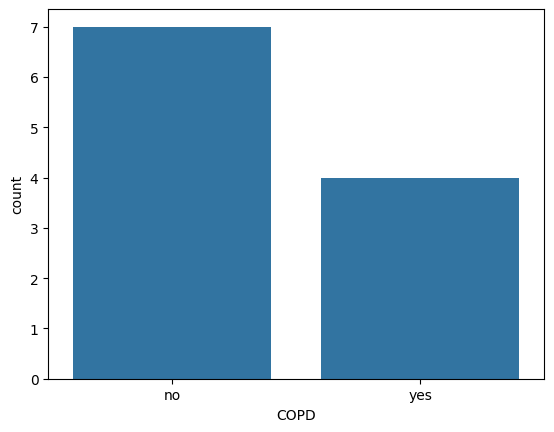

In [ ]:
sns.countplot(data = data, x = 'COPD')

$$
Info(COPD) = -\sum_{1}^{2}(P_i \cdot log_2(P_i))  = -P(yes) \cdot log_2(P(yes)) - P(no) \cdot log_2(P(no)) = - \frac{4}{11} \cdot log_2(\frac{4}{11}) - \frac{7}{11} \cdot log_2(\frac{7}{11}) = 0.9456603046
$$


###2.1.2 Calculation of the conditional entropy and gain in relation to 'age range'

$$
Gain(ageRange) = Info(COPD) - Info_{agerange}(COPD)
$$

$$
Info_{ageRange}(COPD) = Info(COPD | ageRange) =-\sum_{1}^{2}(P(ageRange=v_j) \cdot Info(COPD | ageRange=v_j) )
$$

In [ ]:
data[['age range','COPD']]

,age range,COPD
0,middle-age adult,no
1,old adult,yes
2,young adult,no
3,old adult,yes
4,middle-age adult,no
5,old adult,yes
6,middle-age adult,no
7,old adult,no
8,middle-age adult,no
9,old adult,yes


In [ ]:
data[['age range','COPD']].groupby('age range').count()

,COPD
age range,
middle-age adult,4
old adult,5
young adult,2


vj | $$P(ageRange=v_j)$$
-------------------|------------------
young adult  | $$\frac{2}{11}$$
middle-age adult | $$\frac{4}{11}$$
old adult | $$\frac{5}{11}$$

Now well calculate $$Info(COPD | ageRange=v_j$$

<Axes: xlabel='COPD', ylabel='count'>

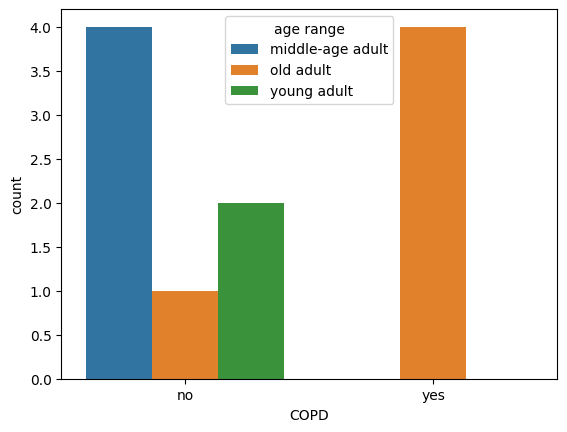

In [ ]:
sns.countplot(data = data, x = 'COPD', hue = 'age range')

$$Info(COPD | ageRange=youngAdult)=-\frac{2}{2}\cdot log_2(\frac{2}{2}) = 0$$

$$Info(COPD | ageRange=middleAgeAdult)=-\frac{4}{4}\cdot log_2(\frac{4}{4}) = 0$$

$$Info(COPD | ageRange=oldAdult)=-\frac{2}{6}\cdot log_2(\frac{2}{6})-\frac{4}{6}\cdot log_2(\frac{4}{6})= 0.9182958341$$

vj | $$P(ageRange=v_j)$$ | $$Info(COPD | ageRange=v_j)$$
-------------------|------------------|-------------------
young adult  | $$\frac{2}{11}$$ | 0
middle-age adult | $$\frac{4}{11}$$ | 0
old adult | $$\frac{5}{11}$$ | 0.9182958341

$$Info_{ageRange}(COPD) = \frac{5}{11}\cdot0.9182958341 = 0.4174071973$$

$$Gain(ageRange)=0.9456603046-0.4174071973=0.5282531073$$

###2.1.3 Calculation of the conditional entropy and gain in relation to 'smoking'

In [ ]:
data[['smoking','COPD']]

,smoking,COPD
0,no,no
1,yes,yes
2,no,no
3,yes,yes
4,yes,no
5,yes,yes
6,yes,no
7,no,no
8,no,no
9,yes,yes


<Axes: xlabel='COPD', ylabel='count'>

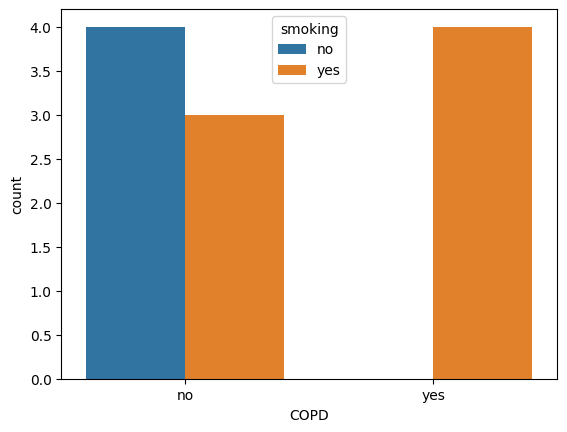

In [ ]:
sns.countplot(data = data, x = 'COPD', hue = 'smoking')

In [ ]:
data[['smoking','COPD']].groupby('smoking').count()

,COPD
smoking,
no,4
yes,7


vj | $$P(smoking=v_j)$$ | $$Info(COPD | smoking=v_j)$$
-------------------|------------------|-------------------
yes  | $$\frac{7}{11}$$ | $$-\frac{3}{7}\cdot log_2(\frac{3}{7}) -\frac{4}{7}\cdot log_2(\frac{4}{7}) = 0.985228136$$
no | $$\frac{4}{11}$$ | $$-\frac{4}{4}\cdot log_2(\frac{4}{4})+0=0$$

$$Info_{smoking}(COPD) = \frac{7}{11}\cdot0.985228136 + 0 = 0.6269633593$$

$$Gain(smoking)=0.9456603046-0.6269633593=0.3186969453$$

###2.1.4 Calculation of the conditional entropy and gain in relation to 'marital status'

In [ ]:
data[['marital status','COPD']].groupby('marital status').count()

,COPD
marital status,
married,9
single,2


<Axes: xlabel='COPD', ylabel='count'>

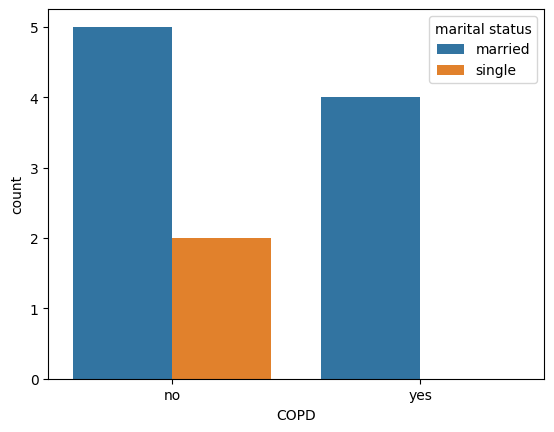

In [ ]:
sns.countplot(data = data, x = 'COPD', hue = 'marital status')

vj | $$P(maritalStaus=v_j)$$ | $$Info(COPD | maritalStaus=v_j)$$
-------------------|------------------|-------------------
married  | $$\frac{9}{11}$$ | $$-\frac{5}{9}\cdot log_2(\frac{4}{9}) -\frac{4}{9}\cdot log_2(\frac{4}{9}) = 0.9910760598$$
single | $$\frac{2}{11}$$ | $$-\frac{2}{2}\cdot log_2(\frac{2}{2})+0=0$$

$$Info_{maritalStaus}(COPD) = \frac{9}{11}\cdot0.9910760598 + 0 = 0.8108804126$$

$$Gain(maritalStaus)=0.9456603046-0.4504891181=0.134780492$$

###2.1.5 Calculation of the conditional entropy and gain in relation to 'Dyspnea during exercise'

In [ ]:
data[['Dyspnea during exercise','COPD']].groupby('Dyspnea during exercise').count()

,COPD
Dyspnea during exercise,
no,5
yes,6


<Axes: xlabel='COPD', ylabel='count'>

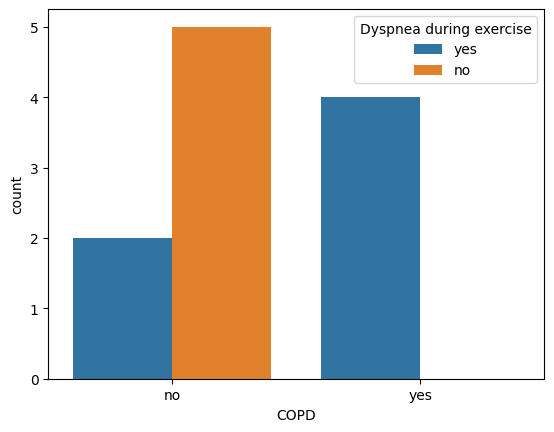

In [ ]:
sns.countplot(data = data, x = 'COPD', hue = 'Dyspnea during exercise')

vj | $$P(DyspneaDuringExercise=v_j)$$ | $$Info(COPD | DyspneaDuringExercise=v_j)$$
-------------------|------------------|-------------------
yes  | $$\frac{6}{11}$$ | $$-\frac{2}{6}\cdot log_2(\frac{2}{6}) -\frac{4}{6}\cdot log_2(\frac{4}{6}) = 0.9182958341$$
no | $$\frac{5}{11}$$ | $$-\frac{5}{5}\cdot log_2(\frac{5}{5})+0=0$$

$$Info_{DyspneaDuringExercise}(COPD) = \frac{6}{11}\cdot0.9182958341 + 0 = 0.5008886368$$

$$Gain(DyspneaDuringExercise)=0.9456603046-0.5008886368=0.4447717092$$

###2.1.6 Calculation of the conditional entropy and gain in relation to 'wheezing'

In [ ]:
data[['wheezing','COPD']].groupby('wheezing').count()

,COPD
wheezing,
no,4
yes,7


<Axes: xlabel='COPD', ylabel='count'>

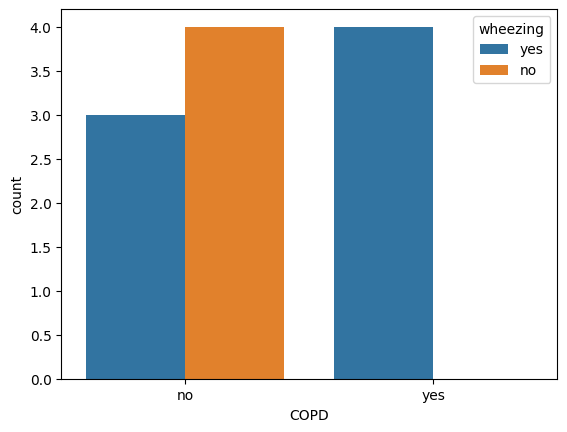

In [ ]:
sns.countplot(data = data, x = 'COPD', hue = 'wheezing')

vj | $$P(wheezing=v_j)$$ | $$Info(COPD | wheezing=v_j)$$
-------------------|------------------|-------------------
yes  | $$\frac{7}{11}$$ | $$-\frac{3}{7}\cdot log_2(\frac{3}{7}) -\frac{4}{7}\cdot log_2(\frac{4}{7}) = 0.985228136$$
no | $$\frac{4}{11}$$ | $$-\frac{4}{4}\cdot log_2(\frac{4}{4})+0=0$$

$$Info_{wheezing}(COPD) = \frac{7}{11}\cdot0.985228136 + 0 = 0.6269633593$$

$$Gain(wheezing)=0.9456603046-0.6269633593=0.3186969453$$

###2.1.7 Calculation of the conditional entropy and gain in relation to 'phlegm'

In [ ]:
data[['phlegm','COPD']].groupby('phlegm').count()

,COPD
phlegm,
no,5
yes,6


<Axes: xlabel='COPD', ylabel='count'>

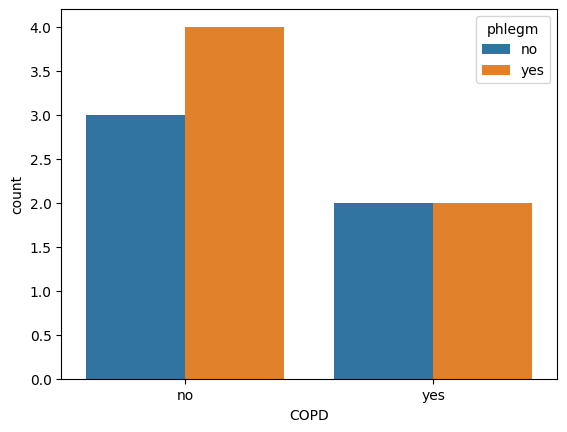

In [ ]:
sns.countplot(data = data, x = 'COPD', hue = 'phlegm')

vj | $$P(phlegm=v_j)$$ | $$Info(COPD | phlegm=v_j)$$
-------------------|------------------|-------------------
yes  | $$\frac{6}{11}$$ | $$-\frac{2}{6}\cdot log_2(\frac{2}{6}) -\frac{4}{6}\cdot log_2(\frac{4}{6}) = 0.9182958341$$
no | $$\frac{5}{11}$$ | $$-\frac{3}{5}\cdot log_2(\frac{3}{5})-\frac{2}{5}\cdot log_2(\frac{2}{5})=0.9709505945$$

$$Info_{phlegm}(COPD) = \frac{6}{11}\cdot0.9182958341 + \frac{5}{11}\cdot0.9709505945 = 0.9422298161$$

$$Gain(phlegm)=0.9456603046-0.9422298161=0.003430488$$

###2.1.8 Calculation of the conditional entropy and gain in relation to 'uses an inhaler'

In [ ]:
data[['uses an inhaler','COPD']].groupby('uses an inhaler').count()

,COPD
uses an inhaler,
no,7
yes,4


<Axes: xlabel='COPD', ylabel='count'>

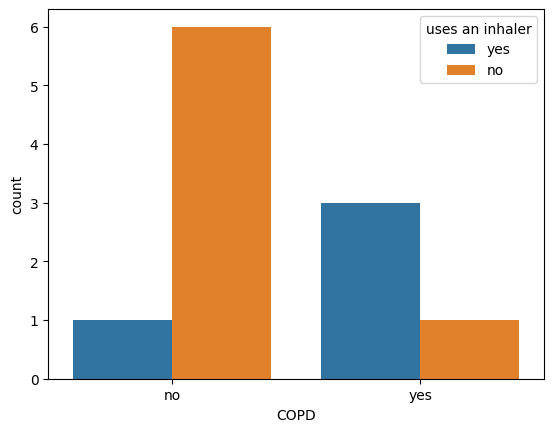

In [ ]:
sns.countplot(data = data, x = 'COPD', hue = 'uses an inhaler')

vj | $$P(usesAnInhaler=v_j)$$ | $$Info(COPD | usesAnInhaler=v_j)$$
-------------------|------------------|-------------------
yes  | $$\frac{4}{11}$$ | $$-\frac{1}{4}\cdot log_2(\frac{1}{4}) -\frac{3}{4}\cdot log_2(\frac{3}{4}) =0.8112781245$$
no | $$\frac{7}{11}$$ | $$-\frac{6}{7}\cdot log_2(\frac{6}{7})-\frac{1}{7}\cdot log_2(\frac{1}{7})=0.5916727786$$

$$Info_{usesAnInhaler}(COPD) = \frac{4}{11}\cdot0.8112781245 + \frac{7}{11}\cdot0.5916727786 = 0.671529268$$

$$Gain(usesAnInhaler)=0.9456603046-0.671529268=0.2741310366$$

###2.1.9 Summary of the first iteration of the calculations:

$$Gain(ageRange)=0.5282531073$$

$$Gain(smoking)=0.3186969453$$

$$Gain(maritalStaus)=0.134780492$$

$$Gain(DyspneaDuringExercise)=0.4447717092$$

$$Gain(wheezing)=0.3186969453$$

$$Gain(phlegm)=0.003430488$$

$$Gain(usesAnInhaler)=0.2741310366$$

From the list above we conclude that the best feature do devide the root of the tree will be the 'age range', because we have the most informational gain from all the other features.

We can see that this feature splits the data pretty good, the 'young adult' and 'middle aged adults' samples dont have 'COPD' and that all of the samples that do have it, are in the 'old adults'

Let's see the DFs:

In [ ]:
data[data['age range'] == 'young adult']

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
2,3,young adult,no,single,no,yes,yes,no,no
10,12,young adult,yes,married,no,no,yes,no,no


In [ ]:
data[data['age range'] == 'middle-age adult']

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
0,1,middle-age adult,no,married,yes,yes,no,yes,no
4,5,middle-age adult,yes,single,no,no,yes,no,no
6,8,middle-age adult,yes,married,yes,no,no,no,no
8,10,middle-age adult,no,married,no,no,yes,no,no


In [ ]:
data[data['age range'] == 'old adult']

,no. of participant,age range,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
1,2,old adult,yes,married,yes,yes,yes,yes,yes
3,4,old adult,yes,married,yes,yes,yes,yes,yes
5,7,old adult,yes,married,yes,yes,no,no,yes
7,9,old adult,no,married,no,yes,no,no,no
9,11,old adult,yes,married,yes,yes,no,yes,yes


Now our desicion tree wil split like the following: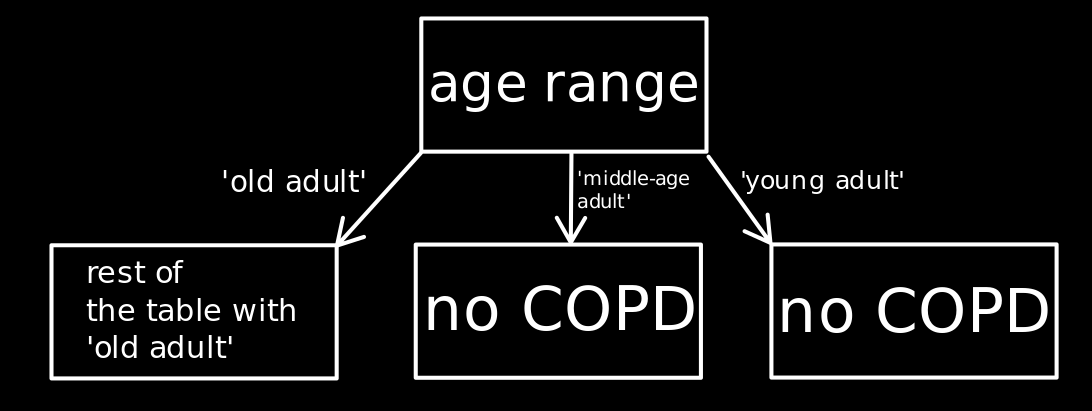

##2.2. Second iteration of calculating the conditional entropy and gain in relation to other features.

Now after splitting the data by the 'age range' feature, we only have to make calculations on the data where the age of the samples are 'old adult'.

We'll make a new dataframe to work with it.

In [ ]:
age_split_data = data[data['age range'] == 'old adult']

We will also drop the 'age range' column because it is not relevant for us anymore

In [ ]:
age_split_data.drop('age range', axis = 1, inplace = True)

<ipython-input-124-9d38356a6007>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_split_data.drop('age range', axis = 1, inplace = True)


Check the data to see that everything is proceeding good

In [ ]:
age_split_data

,no. of participant,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
1,2,yes,married,yes,yes,yes,yes,yes
3,4,yes,married,yes,yes,yes,yes,yes
5,7,yes,married,yes,yes,no,no,yes
7,9,no,married,no,yes,no,no,no
9,11,yes,married,yes,yes,no,yes,yes


###2.2.1. Calcualte the overall entrhopy of the 'COPD' column:

<Axes: xlabel='COPD', ylabel='count'>

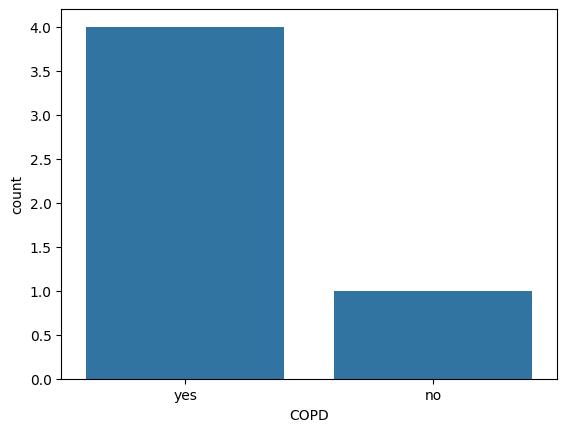

In [ ]:
sns.countplot(data = age_split_data, x = 'COPD')

$$
Info(COPD) = -\sum_{1}^{2}(P_i \cdot log_2(P_i))  = -P(yes) \cdot log_2(P(yes)) - P(no) \cdot log_2(P(no)) = - \frac{4}{5} \cdot log_2(\frac{4}{5}) - \frac{1}{5} \cdot log_2(\frac{1}{5}) = 0.7219280949
$$


###2.2.2 Calculation of the conditional entropy and gain in relation to 'smoking'

In [ ]:
age_split_data[['smoking','COPD']].groupby('smoking').count()

,COPD
smoking,
no,1
yes,4


<Axes: xlabel='COPD', ylabel='count'>

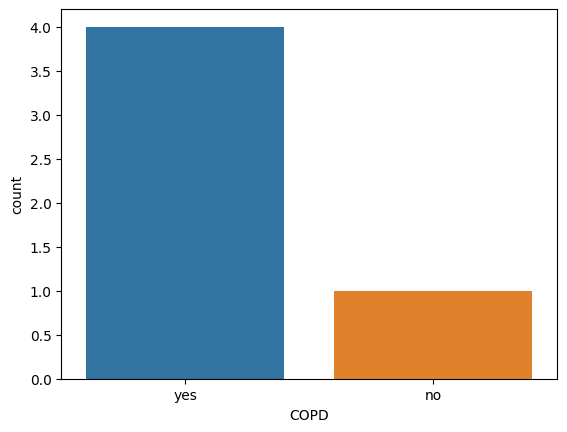

In [ ]:
sns.countplot(data = age_split_data, x = 'COPD', hue = 'smoking')

vj | $$P(smoking=v_j)$$ | $$Info(COPD | smoking=v_j)$$
-------------------|------------------|-------------------
yes  | $$\frac{4}{5}$$ | $$-\frac{4}{4}\cdot log_2(\frac{4}{4}) + 0 =0$$
no | $$\frac{1}{5}$$ | $$-\frac{1}{1}\cdot log_2(\frac{1}{1})+0=0$$

$$Info_{smoking}(COPD) = \frac{4}{5}\cdot0 + \frac{1}{5}\cdot0 = 0$$

$$Gain(smoking)=0.7219280949-0=0.7219280949$$

###2.2.2 Calculation of the conditional entropy and gain in relation to 'marital status'

In [ ]:
age_split_data[['marital status','COPD']].groupby('marital status').count()

,COPD
marital status,
married,5


<Axes: xlabel='COPD', ylabel='count'>

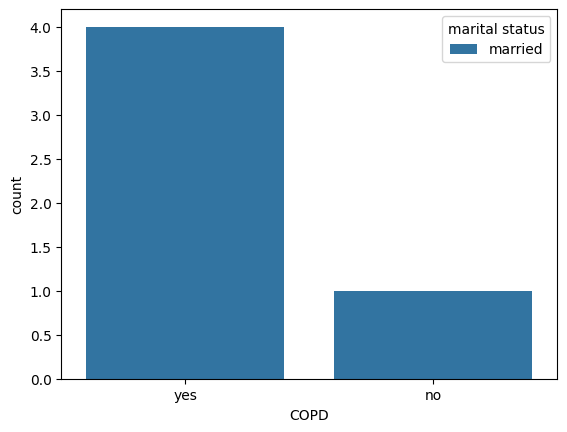

In [ ]:
sns.countplot(data = age_split_data, x = 'COPD', hue = 'marital status')

vj | $$P(maritalStatus=v_j)$$ | $$Info(COPD | maritalStatus=v_j)$$
-------------------|------------------|-------------------
married  | $$\frac{5}{5}$$ | $$-\frac{4}{5}\cdot log_2(\frac{4}{5}) -\frac{1}{5}\cdot log_2(\frac{1}{5}) = 0.7219280949$$
single | $$\frac{0}{5}$$ | 0

$$Info_{maritalStatus}(COPD) = \frac{5}{5}\cdot0.7219280949 + 0 = 0.7219280949$$

$$Gain(maritalStatus=0.7219280949-0.7219280949=0$$

###2.2.3 Calculation of the conditional entropy and gain in relation to 'Dyspnea during exercise'

In [ ]:
age_split_data[['Dyspnea during exercise','COPD']].groupby('Dyspnea during exercise').count()

,COPD
Dyspnea during exercise,
no,1
yes,4


<Axes: xlabel='COPD', ylabel='count'>

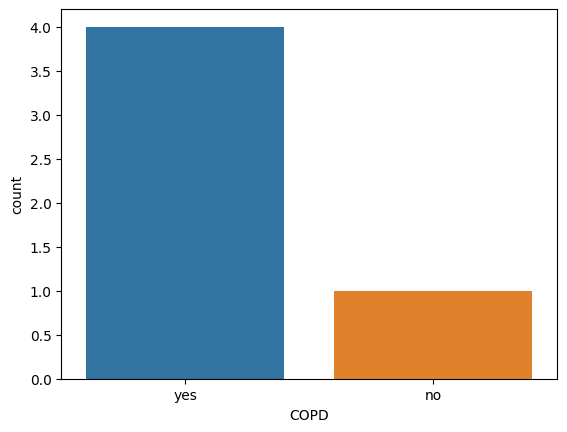

In [ ]:
sns.countplot(data = age_split_data, x = 'COPD', hue = 'Dyspnea during exercise')

vj | $$P(DyspneaDuringExercise=v_j)$$ | $$Info(COPD | DyspneaDuringExercise=v_j)$$
-------------------|------------------|-------------------
yes  | $$\frac{4}{5}$$ | $$-\frac{4}{4}\cdot log_2(\frac{4}{4}) + 0 = 0$$
no | $$\frac{1}{5}$$ | $$-\frac{1}{1}\cdot log_2(\frac{1}{1}) + 0 = 0$$

$$Info_{DyspneaDuringExercise}(COPD) = \frac{4}{5}\cdot0 + \frac{1}{5}\cdot0 = 0$$

$$Gain(DyspneaDuringExercise)=0.7219280949-0=0.7219280949$$

###2.2.4 Calculation of the conditional entropy and gain in relation to 'wheezing'

In [ ]:
age_split_data[['wheezing','COPD']].groupby('wheezing').count()

,COPD
wheezing,
yes,5


<Axes: xlabel='COPD', ylabel='count'>

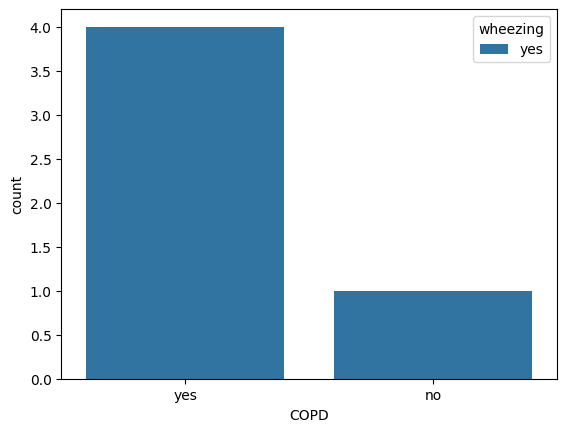

In [ ]:
sns.countplot(data = age_split_data, x = 'COPD', hue = 'wheezing')

vj | $$P(wheezing=v_j)$$ | $$Info(COPD | wheezing=v_j)$$
-------------------|------------------|-------------------
yes  | $$\frac{5}{5}$$ | $$-\frac{4}{5}\cdot log_2(\frac{4}{5}) -\frac{1}{5}\cdot log_2(\frac{1}{5}) = 0.7219280949$$
no | $$\frac{0}{5}$$ | $$0$$

$$Info_{wheezing}(COPD) = \frac{5}{5}\cdot0.7219280949 + 0  = 0.7219280949$$

$$Gain(wheezing)=0.7219280949-0.7219280949=0$$

###2.2.5 Calculation of the conditional entropy and gain in relation to 'phlegm'

In [ ]:
age_split_data[['phlegm','COPD']].groupby('phlegm').count()

,COPD
phlegm,
no,3
yes,2


<Axes: xlabel='COPD', ylabel='count'>

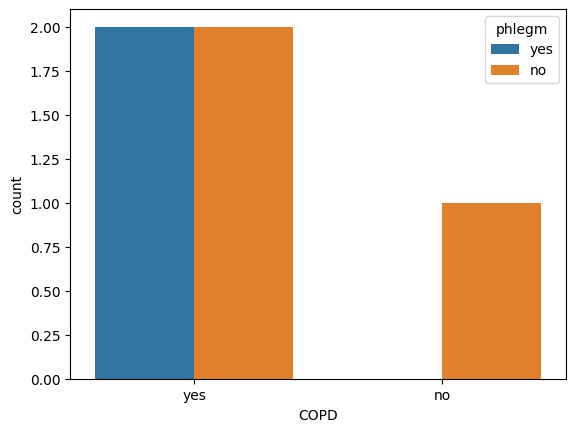

In [ ]:
sns.countplot(data = age_split_data, x = 'COPD', hue = 'phlegm')

vj | $$P(phlegm=v_j)$$ | $$Info(COPD | phlegm=v_j)$$
-------------------|------------------|-------------------
yes  | $$\frac{2}{5}$$ | $$-\frac{2}{2}\cdot log_2(\frac{2}{2}) + 0 = 0$$
no | $$\frac{3}{5}$$ | $$-\frac{2}{3}\cdot log_2(\frac{2}{3}) -\frac{1}{3}\cdot log_2(\frac{1}{3}) = 0.9182958341$$

$$Info_{phlegm}(COPD) = \frac{3}{5}\cdot0.9182958341 + 0 = 0.5509775005$$

$$Gain(phlegm)=0.7219280949-0.5509775005=0.1709505944$$

###2.2.6 Calculation of the conditional entropy and gain in relation to 'uses an inhaler'

In [ ]:
age_split_data[['uses an inhaler','COPD']].groupby('uses an inhaler').count()

,COPD
uses an inhaler,
no,2
yes,3


<Axes: xlabel='COPD', ylabel='count'>

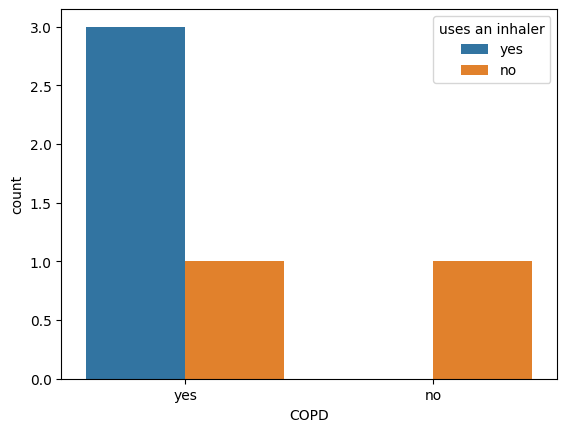

In [ ]:
sns.countplot(data = age_split_data, x = 'COPD', hue = 'uses an inhaler')

vj | $$P(usesAnInhaler=v_j)$$ | $$Info(COPD | usesAnInhaler=v_j)$$
-------------------|------------------|-------------------
yes  | $$\frac{3}{5}$$ | $$-\frac{3}{3}\cdot log_2(\frac{3}{3}) + 0 = 0$$
no | $$\frac{2}{5}$$ | $$-\frac{1}{2}\cdot log_2(\frac{1}{2}) -\frac{1}{2}\cdot log_2(\frac{1}{2}) = 1$$

$$Info_{usesAnInhaler}(COPD) = \frac{2}{5}\cdot1 + 0 = 0.4$$

$$Gain(usesAnInhaler)=0.7219280949-0.4=0.3219280949$$

###2.2.7 Summary of the first iteration of the calculations:

$$Gain(smoking)=0.7219280949$$

$$Gain(maritalStatus)=0$$

$$Gain(DyspneaDuringExercise)=0.7219280949$$

$$Gain(wheezing)=0$$

$$Gain(phlegm)=0.1709505944$$

$$Gain(usesAnInhaler)=0.3219280949$$

From the list above we conclude that the best next feature to devide the node of 'old adult' will be the 'smoking' or ', because they have the most informational gain from all the other features.

We can see that these features split the data pretty good with 0 entropy.

Let's see the DFs:

In [ ]:
age_split_data[age_split_data['smoking'] == 'yes']

,no. of participant,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
1,2,yes,married,yes,yes,yes,yes,yes
3,4,yes,married,yes,yes,yes,yes,yes
5,7,yes,married,yes,yes,no,no,yes
9,11,yes,married,yes,yes,no,yes,yes


In [ ]:
age_split_data[age_split_data['smoking'] == 'no']

,no. of participant,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
7,9,no,married,no,yes,no,no,no


In [ ]:
age_split_data[age_split_data['Dyspnea during exercise'] == 'yes']

,no. of participant,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
1,2,yes,married,yes,yes,yes,yes,yes
3,4,yes,married,yes,yes,yes,yes,yes
5,7,yes,married,yes,yes,no,no,yes
9,11,yes,married,yes,yes,no,yes,yes


In [ ]:
age_split_data[age_split_data['Dyspnea during exercise'] == 'no']

,no. of participant,smoking,marital status,Dyspnea during exercise,wheezing,phlegm,uses an inhaler,COPD
7,9,no,married,no,yes,no,no,no


So for the model we'll choose the first feature out of the two, meaning teh 'smoking' feature will be chosen to split the next node and terminating the algorithm.

The decision tree that is based on the ID3 algorithm will be the following:

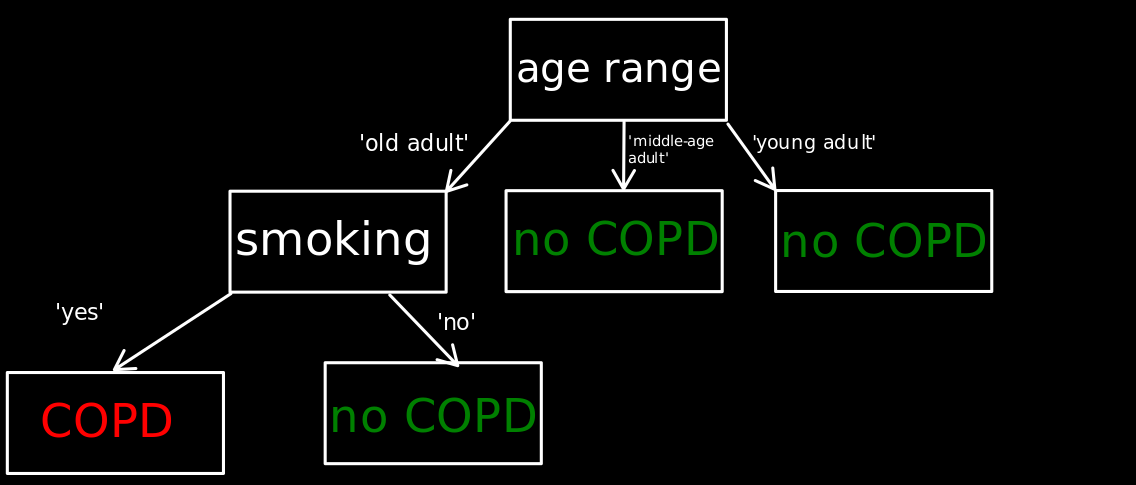

Now after completing the algorithms we can conclude that the other features besides 'age range', 'smoking' are not needed for the model, so we can remove them.